### Chapter 3: Dealing with missing values:

In this activity, we explore titanic data for digging into missing values and treat with them with one of the methods discussed in this chapter. 

In [3]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('titanic passenger list.csv') 

We check first the basic data characteristics  such as:
* length (rows)
* width (or columns)
* column types
* basic stats
* head & tail of data

In [4]:
df1.head() # first 5


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Most of the columns are descriptive... except:

* sibsp:           Number of Siblings/Spouses Aboard
* parch:           Number of Parents/Children Aboard

https://www.kaggle.com/c/titanic/data

and
* embarked is 'S'?

"922 passengers were recorded as having embarked Titanic at Southampton. Additional passengers were picked up at Cherbourg and Queenstown."

So 'S' appears to be Southampton

https://en.wikipedia.org/wiki/RMS_Titanic


In [6]:
df1.tail() 
# or
# df1[-5:] # last 5 records

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


## info()

* tells us there are 1309 x 14 records

* gives us details on datatype, 'object' here means string, the others are int and float

* We can also see 'non-null' - half the records are complete, some (e.g. 'cabin' has a lot of nulls i.e. are missing) 


In [8]:
df1.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


### describe()
This method tabulates numeric data by default. 

We know there are 1309 records and the first row, 'count' confirms that there are values for most fields:

- pclass, survived, sibsp, parch have 1309 records (all there, may be 0 or otherwise invalid, but all there)

- age, fare & body have records missing

#### Which of these are potentially imputatable i.e. we can derive values from existing data?

We can ask describe() to show other fields:


In [9]:
df1.describe(include=['O']) # 'O' for Objects

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,929,186,3,27,369
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


### describe() objects

- name, sex  and ticket attributes have no missing values. 
- cabin, embarked, boat and home.dest have records that are missing. 


#### Which of these are potentially imputatable i.e. we can derive values from existing data?

Other novelties: 

Inspecting closely to name values, there are 1307 unique names i.e. two people with the same name: "Kelly, Mr. James"

So we look at the other attributes for these two people, they may have the same age, ticket, cabin etc. 

There are also 1309 tickets but a lot appear to be 'shared', 11 in the case of 'CA. 2343'

In [10]:
df1[df1.name == "Kelly, Mr. James"] # appear to be different people, unrelated

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
924,3,0,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,70.0,NaN
925,3,0,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S,NaN,NaN,NaN


In [11]:
df1[df1.ticket == "CA. 2343"] 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1170,3,0,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1171,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S,NaN,67.0,NaN
1172,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1173,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1174,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1175,3,0,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1176,3,0,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1177,3,0,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1178,3,0,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1179,3,0,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S,NaN,NaN,NaN


11 members of the Sage family travelled on one ticket, £70 for 3rd class, seems a lot, divide by 11 is about right

none of them survived

we can also see sibsp & parch in action 'Sage, Mr. John George' and 'Sage, Mrs. John (Annie Bullen)' would appear to be the parents of 9 children

http://www.encyclopedia-titanica.org/titanic-victim/john-george-sage.html

#### How old are the parents likely to be?

In [12]:
# we can explore fields one by one

df1['pclass'].unique()

array([1, 2, 3])

In [13]:
# pclass all there? Check:
df1['pclass'].value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

### unique() and value_counts()
gives us the same results as describe()

Check the maths that validates the three values sum up to the total of 1309. 

In [14]:
709 + 323 + 277

1309

In [15]:
# or
sum(df1['pclass'].value_counts())

1309

In [16]:
# check again
df1[df1['pclass'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


In [14]:
# or plot:
h = df1['pclass'].hist()

## Passenger class
The above confirm that, for 'pclass':

* there are three classes (1st, 2nd, 3rd)
* there are no missing values
* most passengers (more than half) were in 3rd i.e. 'below decks'

Your turn, explore the next 3 fields, looking for missing values:

In [15]:
# 'survived'


In [16]:
# 'names'
# not much point in doing 'unique()' or 'value_counts()' on 'names'
# try isnull()


In [17]:
# 'sex'


## Missing values: ages

Titanic data is commonly used for predictive analytics, e.g. remove the 'survived' column and feed the other data into an algorithm to see if there are any predictors for survival, pclass was a factor, also gender, age another (and if you ever go on a cruise ship change your name to "Womenandchildren").

Age are mostly missing. Should we just delete or do something basic like:  

meanAge = np.mean(df1.age)

df1.age = df1.age.fillna(meanAge) 

#### What's wrong with this approach?

#### What is the average age anyway?

#### What is the average age for males, for females? Is that an improvement?


In [17]:
np.mean(df1.age)

29.881137667304014

In [18]:
# age - we know there are some missing, let's dig deeper
df1['age'].value_counts()

24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
25.00    34
28.00    32
36.00    31
29.00    30
27.00    30
26.00    30
19.00    29
23.00    26
32.00    24
31.00    23
35.00    23
20.00    23
33.00    21
45.00    21
39.00    20
17.00    20
16.00    19
42.00    18
40.00    18
34.00    16
50.00    15
48.00    14
38.00    14
47.00    14
2.00     12
         ..
28.50     3
65.00     3
59.00     3
45.50     2
71.00     2
36.50     2
34.50     2
14.50     2
0.92      2
30.50     2
70.00     2
0.17      1
0.42      1
74.00     1
0.67      1
26.50     1
80.00     1
11.50     1
60.50     1
24.50     1
38.50     1
55.50     1
20.50     1
76.00     1
23.50     1
22.50     1
70.50     1
67.00     1
66.00     1
0.33      1
Name: age, dtype: int64

In [19]:
# mostly younger, 20s to 30s
df1['age'].unique()

array([ 29.  ,   0.92,   2.  ,  30.  ,  25.  ,  48.  ,  63.  ,  39.  ,
        53.  ,  71.  ,  47.  ,  18.  ,  24.  ,  26.  ,  80.  ,    nan,
        50.  ,  32.  ,  36.  ,  37.  ,  42.  ,  19.  ,  35.  ,  28.  ,
        45.  ,  40.  ,  58.  ,  22.  ,  41.  ,  44.  ,  59.  ,  60.  ,
        33.  ,  17.  ,  11.  ,  14.  ,  49.  ,  76.  ,  46.  ,  27.  ,
        64.  ,  55.  ,  70.  ,  38.  ,  51.  ,  31.  ,   4.  ,  54.  ,
        23.  ,  43.  ,  52.  ,  16.  ,  32.5 ,  21.  ,  15.  ,  65.  ,
        28.5 ,  45.5 ,  56.  ,  13.  ,  61.  ,  34.  ,   6.  ,  57.  ,
        62.  ,  67.  ,   1.  ,  12.  ,  20.  ,   0.83,   8.  ,   0.67,
         7.  ,   3.  ,  36.5 ,  18.5 ,   5.  ,  66.  ,   9.  ,   0.75,
        70.5 ,  22.5 ,   0.33,   0.17,  40.5 ,  10.  ,  23.5 ,  34.5 ,
        20.5 ,  30.5 ,  55.5 ,  38.5 ,  14.5 ,  24.5 ,  60.5 ,  74.  ,
         0.42,  11.5 ,  26.5 ])

Notice the 'nan' above, it doesn't occur in counts() 

#### How many 'NaN' values for age are there?
#### How many 0?
#### How many < 1?
#### What does 'NaN' mean?
#### Is NaN == NaN true in Python?

In [20]:
df1[df1['age'].isnull()].head() # look at some

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY"
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA"
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA"
46,1,0,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,NaN,NaN,NaN
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,NaN,C,5,NaN,"New York, NY"


In [21]:
df1[df1['age'] < 1]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
359,2,1,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,13,NaN,"Bangkok, Thailand / Roseville, IL"
427,2,1,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,4,NaN,"Detroit, MI"
548,2,1,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,4,NaN,"Cornwall / Akron, OH"
590,2,1,"West, Miss. Barbara J",female,0.92,1,2,C.A. 34651,27.7500,NaN,S,10,NaN,"Bournmouth, England"
611,3,1,"Aks, Master. Philip Frank",male,0.83,0,1,392091,9.3500,NaN,S,11,NaN,"London, England Norfolk, VA"
657,3,1,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C,C,NaN,"Syria New York, NY"
658,3,1,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C,C,NaN,"Syria New York, NY"
747,3,0,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4000,NaN,S,NaN,NaN,"Stanton, IA"
763,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.17,1,2,C.A. 2315,20.5750,NaN,S,10,NaN,"Devon, England Wichita, KS"


#### What does age = 0.17 mean?

In [22]:
h = df1['age'].hist()

In [23]:
sum(df1['age'].isnull())
# 263 passengers have no age recorded.

263

### Let's look at other factors, e.g. names can give a clue because most passengers seem to have a title (e.g. 'Mrs')

#### Can we assume that 'Mrs' implies married (implies not a child)?

#### What about 'Miss' or 'Ms'?


In [24]:
# Look into titles, e.g. 'Mrs' implies married (implies not child)
def name_extract(word):
     return word.split(',')[1].split('.')[0].strip()
    
# because names are in this format:
# Allison, Master. Hudson Trevor
# we can split on ','
# then '.'

In [25]:
temp = pd.DataFrame({'Title':df1['name'].apply(name_extract)}) # testing, apply the method to the data
temp[0:5]

,Title
0,Miss
1,Master
2,Miss
3,Mr
4,Mrs


In [26]:
temp['Title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [27]:
# a couple of strange ones but most of the standard titles are there
temp['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Mme               1
the Countess      1
Don               1
Lady              1
Sir               1
Jonkheer          1
Dona              1
Capt              1
Name: Title, dtype: int64

In [28]:
# did we miss any?
sum(temp['Title'].value_counts())

1309

### Impute missing values in age using title information. 

We have titles for everyone and there are only a few strange ones. 

#### So what can we say about 'Master'? Usually refers to boys?

#### Dr, Rev, Col, Major, Capt, Sir, Don, would all be adults? 

Let's go ahead and apply this transformation:

In [29]:
df2 = df1 # copy then insert new column
df2['Title'] = pd.DataFrame(df1['name'].apply(name_extract)) 

In [30]:
df2.head() # title at far right

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs


In [33]:
# just check (again) we got most of them
df2[df2['Title'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title


In [34]:
# look at the doctors
df2[df2['Title'] == "Dr"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA",Dr
93,1,1,"Dodge, Dr. Washington",male,53.0,1,1,33638,81.8583,A34,S,13,NaN,"San Francisco, CA",Dr
119,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S,5,NaN,"New York, NY",Dr
181,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,8,NaN,"New York, NY",Dr
206,1,0,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,NaN,230.0,"Fond du Lac, WI",Dr
278,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,3,NaN,"Basel, Switzerland",Dr
508,2,0,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,NaN,NaN,"Frankfort, KY",Dr
525,2,0,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,NaN,NaN,"Hamilton, ON",Dr


Drs are mostly older (except for Dr Pain)

#### What's the average age of Drs?

In [35]:
df2[df2['Title'] == "Dr"].mean()

pclass        1.250000
survived      0.500000
age          43.571429
sibsp         0.625000
parch         0.125000
fare         53.254688
body        230.000000
dtype: float64

The average age for all passengers is 29, for Drs it's 43. 

#### There's one female - do we need to worry about average age for just the male Drs?

#### What if her age were (coincidentally) 42?

#### Give Brewe, Dr. Arthur Jackson this value (43)?


In [36]:
df2[(df2['Title'] == "Dr") & (df2['sex'] == "male")].mean()

pclass        1.285714
survived      0.428571
age          42.666667
sibsp         0.714286
parch         0.142857
fare         57.158329
body        230.000000
dtype: float64

In [37]:
df2[df2['name'] == 'Brewe, Dr. Arthur Jackson']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,NaN,C,NaN,NaN,"Philadelphia, PA",Dr


In [38]:
df2.age[df2.name == 'Brewe, Dr. Arthur Jackson'] = 43

/Users/Ash/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [39]:
# check
df2[df2['name'] == 'Brewe, Dr. Arthur Jackson']


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title
40,1,0,"Brewe, Dr. Arthur Jackson",male,43.0,0,0,112379,39.6,NaN,C,NaN,NaN,"Philadelphia, PA",Dr


In [40]:
# try 'Col'
df2[df2['Title'] == "Col"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title
10,1,0,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.525,C62 C64,C,NaN,124.0,"New York, NY",Col
136,1,1,"Gracie, Col. Archibald IV",male,53.0,0,0,113780,28.500,C51,C,B,NaN,"Washington, DC",Col
264,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.500,A26,C,3,NaN,"Basel, Switzerland",Col
305,1,0,"Weir, Col. John",male,60.0,0,0,113800,26.550,NaN,S,NaN,NaN,"England Salt Lake City, Utah",Col


no missing values in this one. So let's try another value. 

#### Exercise: look at 'Maj' and any other titles that suggest age 


In [41]:
# Maj


## Missing values: ages for boys

It seems, in this era (pre Jackie Chan), Master did mean boys 

In [42]:
df2[df2['Title'] == "Master"] # how many?

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master
54,1,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA",Master
94,1,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,A34,S,5,NaN,"San Francisco, CA",Master
249,1,1,"Ryerson, Master. John Borie",male,13.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,4,NaN,"Haverford, PA / Cooperstown, NY",Master
273,1,1,"Spedden, Master. Robert Douglas",male,6.00,0,2,16966,134.5000,E34,C,3,NaN,"Tuxedo Park, NY",Master
339,2,1,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S,11,NaN,"Guntur, India / Benton Harbour, MI",Master
359,2,1,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,13,NaN,"Bangkok, Thailand / Roseville, IL",Master
385,2,1,"Davies, Master. John Morgan Jr",male,8.00,1,1,C.A. 33112,36.7500,NaN,S,14,NaN,"St Ives, Cornwall / Hancock, MI",Master
398,2,1,"Drew, Master. Marshall Brines",male,8.00,0,2,28220,32.5000,NaN,S,10,NaN,"Greenport, NY",Master
427,2,1,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,4,NaN,"Detroit, MI",Master


In [43]:
#there are a lot, 61, use describe()
df2[df2['Title'] == "Master"].describe() # min age is 0.33 (4 months?), max is 14.5, mean is 5.5

,pclass,survived,age,sibsp,parch,fare,body
count,61.000000,61.000000,53.000000,61.000000,61.000000,61.000000,3.00000
mean,2.655738,0.508197,5.482642,2.049180,1.377049,36.008195,24.00000
std,0.629424,0.504082,4.161554,1.961515,0.552688,40.677102,37.26929
min,1.000000,0.000000,0.330000,0.000000,0.000000,3.170800,1.00000
25%,2.000000,0.000000,2.000000,1.000000,1.000000,15.245800,2.50000
50%,3.000000,1.000000,4.000000,1.000000,1.000000,26.000000,4.00000
75%,3.000000,1.000000,9.000000,4.000000,2.000000,36.750000,35.50000
max,3.000000,1.000000,14.500000,8.000000,2.000000,262.375000,67.00000


In [44]:
df2[df2['Title'] == "Master"].mean()

pclass       2.655738
survived     0.508197
age          5.482642
sibsp        2.049180
parch        1.377049
fare        36.008195
body        24.000000
dtype: float64

#### How many boys don't have an age?
#### What does describe() (above) tell us about pclass, sibsp, parch?
#### Do any children not have any siblings or parents travelling with them?

#### Any other factors that can help determine (or impute) age?

#### So... want to change all the missing boys ages to the average?

..age.fillna(mean) # Will it give you a right estimate?

#### How would using the mean for all passengers (30), compared to the mean for children/boys (4.5) affect analysis (e.g. survival rates)?

#### Can we do the same for girls (impute ages)?



#### Exercise:  see if you can impute any missing values for 'tickets'


#### do the same for 'cabins'


### Fares are a mystery... 

The rabge of fare price is from \$0, to \$512.329200 (that's a weird number)

Were they converted (£ to \$), half converted, some inflation factored in, shared (i.e. divide cost by passengers)?

According to this website: Facts About The RMS Titanic

Costs of Tickets were:

* First Class (parlor suite) £870

* First Class (berth) £30 

* Second Class £12 

* Third Class £3 to £8

In [45]:
df2['fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [46]:
df2[df2['fare'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN,Mr


## Only one record with missing value in fare. Who is he?
Maybe a stow-away? But that means they're not a passenger..?

Mr Storey... what's your story?

'THIRD CLASS TICKET No. 3701.'

"Storey and several other shipmates; Andrew Shannon [Lionel Leonard], August Johnson, William Henry Törnquist, Alfred Carver and William Cahoone Johnson) forced to travel aboard Titanic as passengers"

http://www.encyclopedia-titanica.org/titanic-survivor/william-henry-tornquist.html

(not really Data Science, more like data nosey)

So that's missing data, got on at 'S' and class '3'

If all the pclass 3 got on at 'S' fares are the same then that's easy to fix, otherwise take a median/mean or just leave it, there's only 1.

df2[(df2.embarked == "S") &  (df2.pclass == 3)]

Did anyone else share that ticket?


In [47]:
df2[df2['ticket'] == '3701']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN,Mr


### Fare with zero value. Is it missing?

In [48]:
df2[df2['fare'] == 0]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,NaN,NaN,"Belfast, NI",Mr
70,1,0,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S,NaN,NaN,"Liverpool, England / Belfast",Mr
125,1,0,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S,NaN,NaN,NaN,Mr
150,1,0,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,NaN,110.0,NaN,Mr
170,1,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S,C,NaN,Liverpool,Mr
223,1,0,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,NaN,NaN,Belfast,Mr
234,1,0,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,NaN,NaN,"Rotterdam, Netherlands",Jonkheer
363,2,0,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,NaN,NaN,Belfast,Mr
384,2,0,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,NaN,NaN,Belfast,Mr
410,2,0,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,NaN,NaN,Belfast,Mr


## Quite a few did not pay, staff... friends... stowaways...

#### Are these missing values or free tickets?

### Who is this guy in THREE cabins (B52 B54 B56)?

#### What is 'LINE'?
(employees, as in White Star Line?)


In [49]:
df2[df2['ticket']=="LINE"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title
896,3,0,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,NaN,NaN,NaN,Mr
898,3,0,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,NaN,NaN,NaN,Mr
963,3,0,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,NaN,NaN,NaN,Mr
1254,3,1,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,15,NaN,NaN,Mr


So there are Mr Storeys shipmates, none of them paid a fare, can we go ahead and change his fare from 'NaN' to 0?
#### But is this imputation if we got the info externally?? 


## Cabins

Nearly 80% of cabin data is missing (1014 out of 1309)

One way to deal with this is to just delete the column?

...drop(['cabin'], axis=1) # destructive!

However, most of the data will be deleted this way. Is there a way to impute it instead?


## Exercise: explore 'embarked' 
in particular:
* unique()
and 
* isnull()

#### What does 'boat' mean?

#### What does 'body' mean?
If someone survived then body makes no sense, if someone didn't (but wasn't recovered) is this the same value (NaN)? 

#### How can you fix this?

#### Can you impute any values?


In [50]:
# bodies
sum(pd.isnull(df2['body'])) # + 121 = 1309

1188

In [51]:
bodies = df1[pd.notnull(df1['body'])]

bodies.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,121.000000,121.0,120.000000,121.000000,121.000000,120.000000,121.000000
mean,2.165289,0.0,36.283333,0.347107,0.280992,32.033438,160.809917
std,0.849972,0.0,14.193698,0.891728,0.848755,42.550246,97.696922
min,1.000000,0.0,2.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.0,25.750000,0.000000,0.000000,8.050000,72.000000
50%,2.000000,0.0,33.500000,0.000000,0.000000,14.477100,155.000000
75%,3.000000,0.0,46.000000,0.000000,0.000000,29.775000,256.000000
max,3.000000,0.0,71.000000,8.000000,5.000000,227.525000,328.000000


In [52]:
bodies.sort(['body'], ascending=True)
# seems to be some sort of recovery numbering system
# but where are 2,3,5,6 etc?

# http://www.encyclopedia-titanica.org/titanic-victims-bodies/
# 5,6 missing from here too but not 2,3 bit of a mystery...

/Users/Ash/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title
1263,3,0,"van Billiard, Master. Walter John",male,11.5,1,1,A/5. 851,14.5000,NaN,S,NaN,1.0,NaN,Master
1096,3,0,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,NaN,4.0,NaN,Master
1153,3,0,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S,NaN,7.0,NaN,Mrs
741,3,0,"Daher, Mr. Shedid",male,22.5,0,0,2698,7.2250,NaN,C,NaN,9.0,NaN,Mr
1294,3,0,"Williams, Mr. Leslie",male,28.5,0,0,54636,16.1000,NaN,S,NaN,14.0,NaN,Mr
516,2,0,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S,NaN,15.0,"Nice, France",Mr
243,1,0,"Rosenshine, Mr. George (""Mr George Thorne"")",male,46.0,0,0,PC 17585,79.2000,NaN,C,NaN,16.0,"New York, NY",Mr
368,2,0,"Chapman, Mr. John Henry",male,37.0,1,0,SC/AH 29037,26.0000,NaN,S,NaN,17.0,"Cornwall / Spokane, WA",Mr
364,2,0,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S,NaN,18.0,"St Ives, Cornwall / Calumet, MI",Mr
425,2,0,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.0000,NaN,S,NaN,19.0,"Bronx, NY",Mr


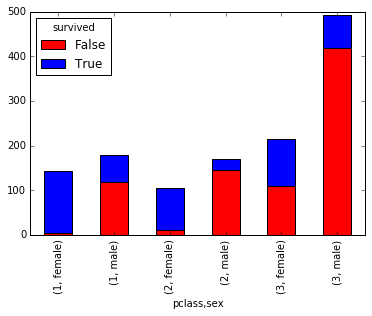

In [53]:
# just to complete the story... what were some of the factors for survival?
import matplotlib.pyplot as plt
%matplotlib inline

ct = pd.crosstab([df1.pclass, df1.sex], df1.survived.astype(bool))
ct.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

### Optional 

There are some libraries for missing values & imputation, just do a search:

* orange is one but they have their own type of table so you may have to commit to that

http://orange.biolab.si/docs/latest/reference/rst/Orange.feature.imputation.html

* scikit is another e.g.     

http://scikit-learn.org/stable/auto_examples/missing_values.html#example-missing-values-py

* PyMC e.g.

http://stronginference.com/missing-data-imputation.html

There's a book with examples:

https://www.oreilly.com/learning/handling-missing-data

